In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("./data/fashion/fashion-mnist_test.csv")

In [4]:
X = df.iloc[:,1:].values
y = df.iloc[:,0].values

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=123)

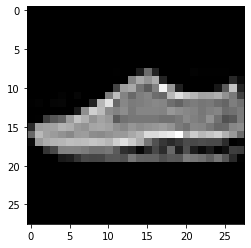

In [9]:
plt.imshow(X_train[1].reshape(28,28), cmap='gray')

In [10]:
y_train[1]

7

In [11]:
set(y)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

## Diferent types of layers

- **Convolutional layer**: several kernels of size `kernel_size` (these are called *filters*) are passed across the image and a scalar matrix product is applied. This has the effect of transforming (filtering). After the convolution, you may apply a non-linear function.

- **Pooling layer:** Pass a window across the transformed layers and choose a representative (max pixel value / average pixel value). This has the effect of reducing image size.

- **Flatten layer:** Bring everything to a flat vector.

- Once we have flat vector (through a flattening layer) we can apply dense layers to get to the desired output size (e.g. a vector of size number of classes). 
- A popular pattern is (Conv, Conv, Pool) followed by (Flatten, Dense, Dense for output)

### Example

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D

In [35]:
model = Sequential([
    Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=(28, 28, 1)),  # (9 weights + 1 bias per layer) * filter
    Conv2D(filters=32, kernel_size=3, activation='relu'), # (32*(9 weights) + 1 bias per layer)*32
    MaxPool2D(pool_size=2), 
    Flatten(),
    Dense(128, activation='relu'), 
    Dense(10, activation='softmax')
])

In [36]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 128)               589952    
_________________________________________________________________
dense_15 (Dense)             (None, 10)                1290      
Total params: 600,810
Trainable params: 600,810
Non-trainable params: 0
________________________________________________

In [72]:
128*4608+128 # weights + bias

589952

In [73]:
128*10+10

1290

### Reshape the data to fit it into the model

In [41]:
X_train = X_train.reshape(-1, 28, 28, 1) # (number of samples, height, width, number of channels)

In [42]:
X_test = X_test.reshape(-1, 28, 28, 1)

In [43]:
X_train = X_train/255. # Note: This rescaling is suitable for this problem, (assuming range of 0-255)
X_test = X_test/255.

In [46]:
model.compile(loss="sparse_categorical_crossentropy", # loss function for integer-valued categories
              metrics=["accuracy", "mse"]
             )

In [47]:
history = model.fit(X_train, y_train, epochs=10, validation_split=0.1)

Train on 6750 samples, validate on 750 samples
Epoch 1/10
6750/6750 [==============================] - 10s 2ms/sample - loss: 0.6662 - accuracy: 0.7668 - mse: 27.9470 - val_loss: 0.6354 - val_accuracy: 0.7973 - val_mse: 27.4547
Epoch 2/10
6750/6750 [==============================] - 11s 2ms/sample - loss: 0.4020 - accuracy: 0.8526 - mse: 27.9600 - val_loss: 0.4486 - val_accuracy: 0.8493 - val_mse: 27.4531
Epoch 3/10
6750/6750 [==============================] - 12s 2ms/sample - loss: 0.3197 - accuracy: 0.8828 - mse: 27.9636 - val_loss: 0.4452 - val_accuracy: 0.8533 - val_mse: 27.4586
Epoch 4/10
6750/6750 [==============================] - 12s 2ms/sample - loss: 0.2596 - accuracy: 0.9073 - mse: 27.9666 - val_loss: 0.4585 - val_accuracy: 0.8560 - val_mse: 27.4600
Epoch 5/10
6750/6750 [==============================] - 11s 2ms/sample - loss: 0.2191 - accuracy: 0.9224 - mse: 27.9687 - val_loss: 0.4220 - val_accuracy: 0.8640 - val_mse: 27.4613
Epoch 6/10
6750/6750 [==========================

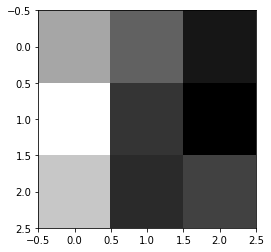

In [56]:
plt.imshow(model.variables[0][:,:,:,0].numpy().reshape(3,3), cmap='gray')

Text(0.5, 0, 'Number of epochs')

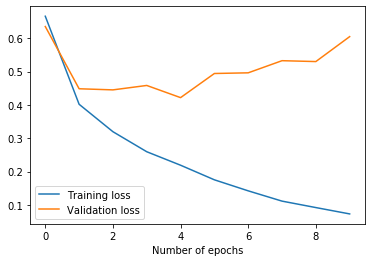

In [59]:
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(loss, label='Training loss')
plt.plot(val_loss, label='Validation loss')
plt.legend()
plt.xlabel("Number of epochs")

In [60]:
X.shape

(10000, 784)

In [62]:
model.variables[1].shape

TensorShape([32])

In [63]:
model.variables[1]

<tf.Variable 'conv2d_14/bias:0' shape=(32,) dtype=float32, numpy=
array([ 0.13592394,  0.00296219, -0.04550339,  0.02113404,  0.02102012,
        0.02621662, -0.02569144,  0.08519498,  0.03139615,  0.03493799,
        0.01955471,  0.02258873,  0.04484887,  0.01807166,  0.03634767,
        0.04005282,  0.01712754, -0.02895989,  0.02858196,  0.02531399,
        0.0274888 ,  0.03362659,  0.0419057 ,  0.03598958,  0.04086909,
        0.00530077,  0.02926097,  0.04249969,  0.01117446,  0.01804965,
        0.01829595, -0.02312437], dtype=float32)>

In [65]:
model.variables[3]

<tf.Variable 'conv2d_15/bias:0' shape=(32,) dtype=float32, numpy=
array([ 0.02821031,  0.00642365,  0.0061962 ,  0.01323071,  0.02552228,
       -0.02120956,  0.00108451, -0.00327709,  0.01240689,  0.00687037,
        0.02280017, -0.02443503,  0.04389071,  0.02765263,  0.00864738,
        0.03779798,  0.0184771 ,  0.01851046, -0.02230013, -0.02120984,
        0.06434564,  0.03348311, -0.02486005,  0.08925631,  0.0528795 ,
       -0.00814272,  0.04208281, -0.00804814,  0.10320524, -0.02599968,
        0.06496385, -0.01016939], dtype=float32)>

## Exercise

- Try to find a better architecture.
- Add another block of (Conv, Conv, Pool) (with more filters).
- Add a `BatchNormalization` layer after each convolution layer. (`tensorflow.keras.layers`)
- Add a `Dropout` layer, setting up different dropout levels. This should help against overfitting.
    - You can add a dropout layer just before the output layer.